
## Main Idea 
> Anomalies are more susceptible to isolation (hence have short path lengths) under random partitioning,

### Method

> In this example, partitions are generated by randomly selecting an attribute and then randomly selecting a split value between the maximum and minimum values of
the selected attribute.
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# default plot settings
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = [5, 5]

In [2]:
X1 = np.random.normal(loc= 0, size= (100,2))
X2 = np.random.normal(loc= 4, size= (100,2))
X3 = np.random.normal(loc= -5, size= (100,2))

A = np.array([[9,-6]])

data = np.concatenate((X1,X2,X3, A))

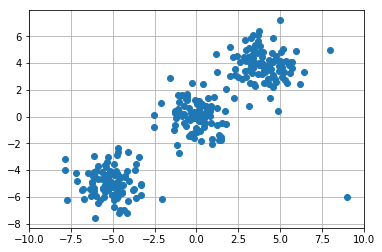

In [3]:
plt.plot(data[:,0], data[:,1],'o')
plt.grid()
plt.xlim([-10, 10])
plt.show()

In [4]:
df = pd.DataFrame(data)
df.head()

,0,1
0,-0.133922,-0.132143
1,0.054875,-1.074449
2,-0.014959,-0.875190
3,0.296036,-0.139512
4,0.443585,-0.779056


In [5]:
# select random feature
f = np.random.choice(df.shape[1])
feature = df.loc[:,f]
# get min and max value of selected feature
mini, maxi = feature.min() , feature.max()
# generate a cut-value between min and max
cut = np.random.uniform(low=mini, high=maxi)
# find isolated instance
isolated_index = -1
smaller, greater = feature[feature < cut], feature[feature >= cut]
if len(smaller) == 1: isolated_index = smaller.index[0]
if len(greater) == 1: isolated_index = greater.index[0]
if isolated_index!= -1:
    isolated = list( df.loc[isolated_index])
    print("cutoff point: ",cut," at feature ", f, "\ngives  ", isolated_index, "th data ", isolated)

In [6]:
def recursive_partition(df, depth = 2, level = 0, info = "start"):
    
    # Base Case 
    if level == depth: return -1
    
    print("\n\n", info); print("At level: ", level)
    
    # select random feature
    f = np.random.choice(df.shape[1])
    feature = df.loc[:,f]
    # get min and max value of selected feature
    mini, maxi = feature.min() , feature.max()
    # generate a cut-value between min and max
    cut = np.random.uniform(low=mini, high=maxi)
    
    print("\n\tcutoff point: ",cut," at feature ", f)
    #print(df)
    # find isolated instance
    smaller, greater = feature[feature < cut], feature[feature >= cut]
    if len(smaller) == 1: return smaller.index[0]
    if len(greater) == 1: return greater.index[0]
    
    # go to small left child
    isolated_index = recursive_partition(df[df[f] < cut ], depth, level = level +1, info = "small")
    if isolated_index != -1: return isolated_index
    
    # go to big right child
    isolated_index  = recursive_partition(df[df[f] >= cut ], depth, level = level +1, info = "big")
    if isolated_index != -1: return isolated_index
    
    return -1
        

In [7]:
iso = recursive_partition(df, depth = 10)
iso



 start
At level:  0

	cutoff point:  2.408457537254133  at feature  1


 small
At level:  1

	cutoff point:  2.114061647966687  at feature  0


 small
At level:  2

	cutoff point:  -4.223704653799716  at feature  0


 small
At level:  3

	cutoff point:  -6.848263245778906  at feature  0


 small
At level:  4

	cutoff point:  -5.633642672896953  at feature  1


294

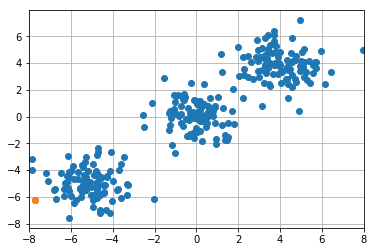

In [8]:
plt.plot(data[:,0], data[:,1],'o')
if iso != -1: plt.plot(data[iso,0], data[iso,1],'o')
plt.grid()
plt.xlim([-8, 8])
plt.show()

In [9]:
a =[]

In [10]:
a.append((4,5))

In [11]:
a

[(4, 5)]

In [12]:
# default plot settings
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = [5, 5]

class myIsolation:
    def __init__(self, data):
        self.path = []
        self.data = data
        df = pd.DataFrame(data)
        self.bool2D = (df.shape[1] == 2)
        
        self.iso = self.recursive_partition(df, depth = int(np.log2(len(data))))
        
        
    def recursive_partition(self, df, depth = 2, level = 0, info = "start"):
    
        # Base Case 
        if level == depth: return -1

        #### print("\n\n", info); print("At level: ", level)

        # select random feature
        f = np.random.choice(df.shape[1])
        feature = df.loc[:,f]
        # get min and max value of selected feature
        mini, maxi = feature.min() , feature.max()
        # generate a cut-value between min and max
        cut = np.random.uniform(low=mini, high=maxi)
        
        ######################################################## 2d draw 
        if self.bool2D:
            other_feature = df.loc[:,df.shape[1]-f-1]
            mini, maxi = other_feature.min() , other_feature.max()

        #### print("\n\tcutoff point: ",cut," at feature ", f)
        self.path.append({'level':level, 
                          'info': info, 
                          'cut' : cut, 
                          'feature' : f, 
                          'mini' :mini, 
                          'maxi' :maxi})
        ######################################################## 2d draw 


        # find isolated instance
        smaller, greater = feature[feature < cut], feature[feature >= cut]
        if len(smaller) == 1: return smaller.index[0]
        if len(greater) == 1: return greater.index[0]

        # go to small left child
        isolated_index = self.recursive_partition(df[df[f] < cut ], depth, level = level +1, info = "small")
        if isolated_index != -1: return isolated_index

        # go to big right child
        isolated_index  = self.recursive_partition(df[df[f] >= cut ], depth, level = level +1, info = "big")
        if isolated_index != -1: return isolated_index

        return -1
    
    def score(self):
        if self.iso != -1: return len(self.path)
    
    def drawCuts(self, fig, ax):
        for i in range(len(self.path)):
            f, v, mi, ma = self.path[i]['feature'], self.path[i]['cut'], self.path[i]['mini'],self.path[i]['maxi']
            x = np.linspace(mi, ma, 100); y = x * 0 + v; print(f, v)
            if f == 0: plt.plot(y,x, color = 'r', linestyle ='--' )
            else: plt.plot(x,y, color = 'r', linestyle ='--' )
        
    def display(self):
        fig, ax = plt.subplots()
        plt.plot(self.data[:,0], self.data[:,1],'o')
        
        if self.iso != -1: plt.plot(self.data[self.iso,0], self.data[self.iso,1],'o')
            
        if self.bool2D: self.drawCuts(fig, ax)
            
        print(self.iso) 
        plt.title("score" + str(self.score()))
        plt.grid(); plt.show()

1 -0.8121112729752795
0 3.2198408312317843
300


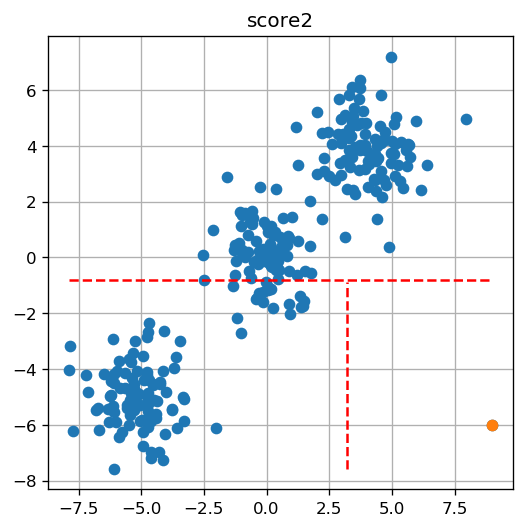

300 2


In [20]:
a = myIsolation(data)
a.display()
print(a.iso, len(a.path))

In [14]:
counter = {}
for i in range(10000):
    a = myIsolation(data)
    isolated,score = a.iso, a.score()
    del(a)
    if counter.get(isolated) == None: counter[isolated] = list()
    counter[isolated].append(score)

<Container object of 112 artists>

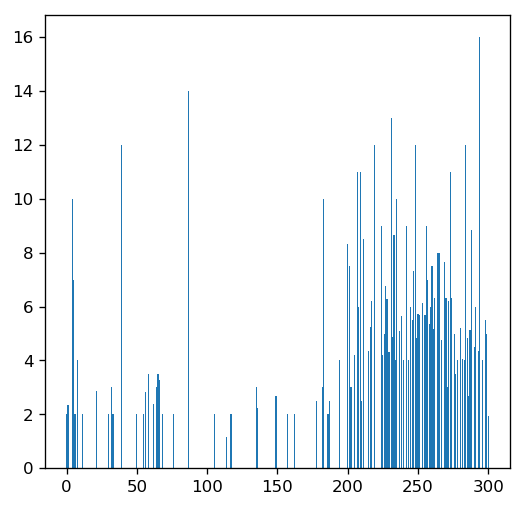

In [21]:
idx = list(counter.keys())
val = [np.mean(counter[k]) for k in counter.keys()]
plt.bar(idx, val)

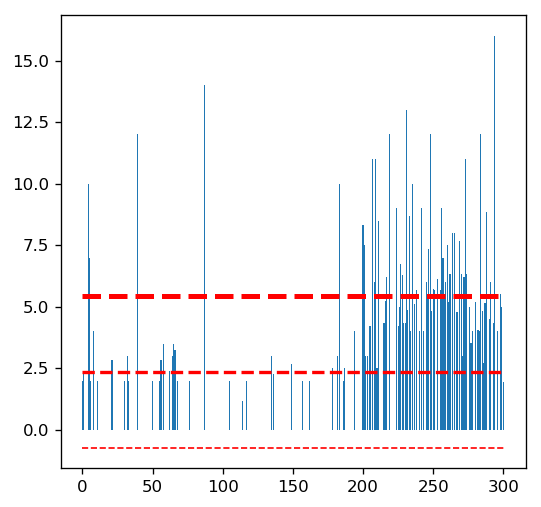

In [23]:
idx = list(counter.keys())
val = [np.mean(counter[k]) for k in counter.keys()]
plt.bar(idx, val)

mu, sigma = np.mean(val), np.std(val)

x = np.linspace(0, data.shape[0], 100); 
y = x * 0 + mu; 
plt.plot(x,y, color = 'r', linestyle ='--' ,lw = 3)

y = x * 0 + mu - sigma; 
plt.plot(x,y, color = 'r', linestyle ='--' ,lw = 2)

y = x * 0 + mu - 2 * sigma; 
plt.plot(x,y, color = 'r', linestyle ='--' ,lw = 1)

In [24]:
import heapq

counter_len = {k:np.mean(counter[k]) for k in counter.keys()}
# Gettings best 5 lines             
anomaly = heapq.nsmallest(10, counter, key=counter_len.get)

In [25]:
anomaly

[114, 300, 186, 0, 76, 157, 33, 11, 55, 68]

In [26]:
[(a, counter_len[a]) for a in anomaly]

[(114, 1.1781818181818182),
 (300, 1.923874053407732),
 (186, 2.0),
 (0, 2.0),
 (76, 2.0),
 (157, 2.0),
 (33, 2.0),
 (11, 2.0),
 (55, 2.0),
 (68, 2.0)]

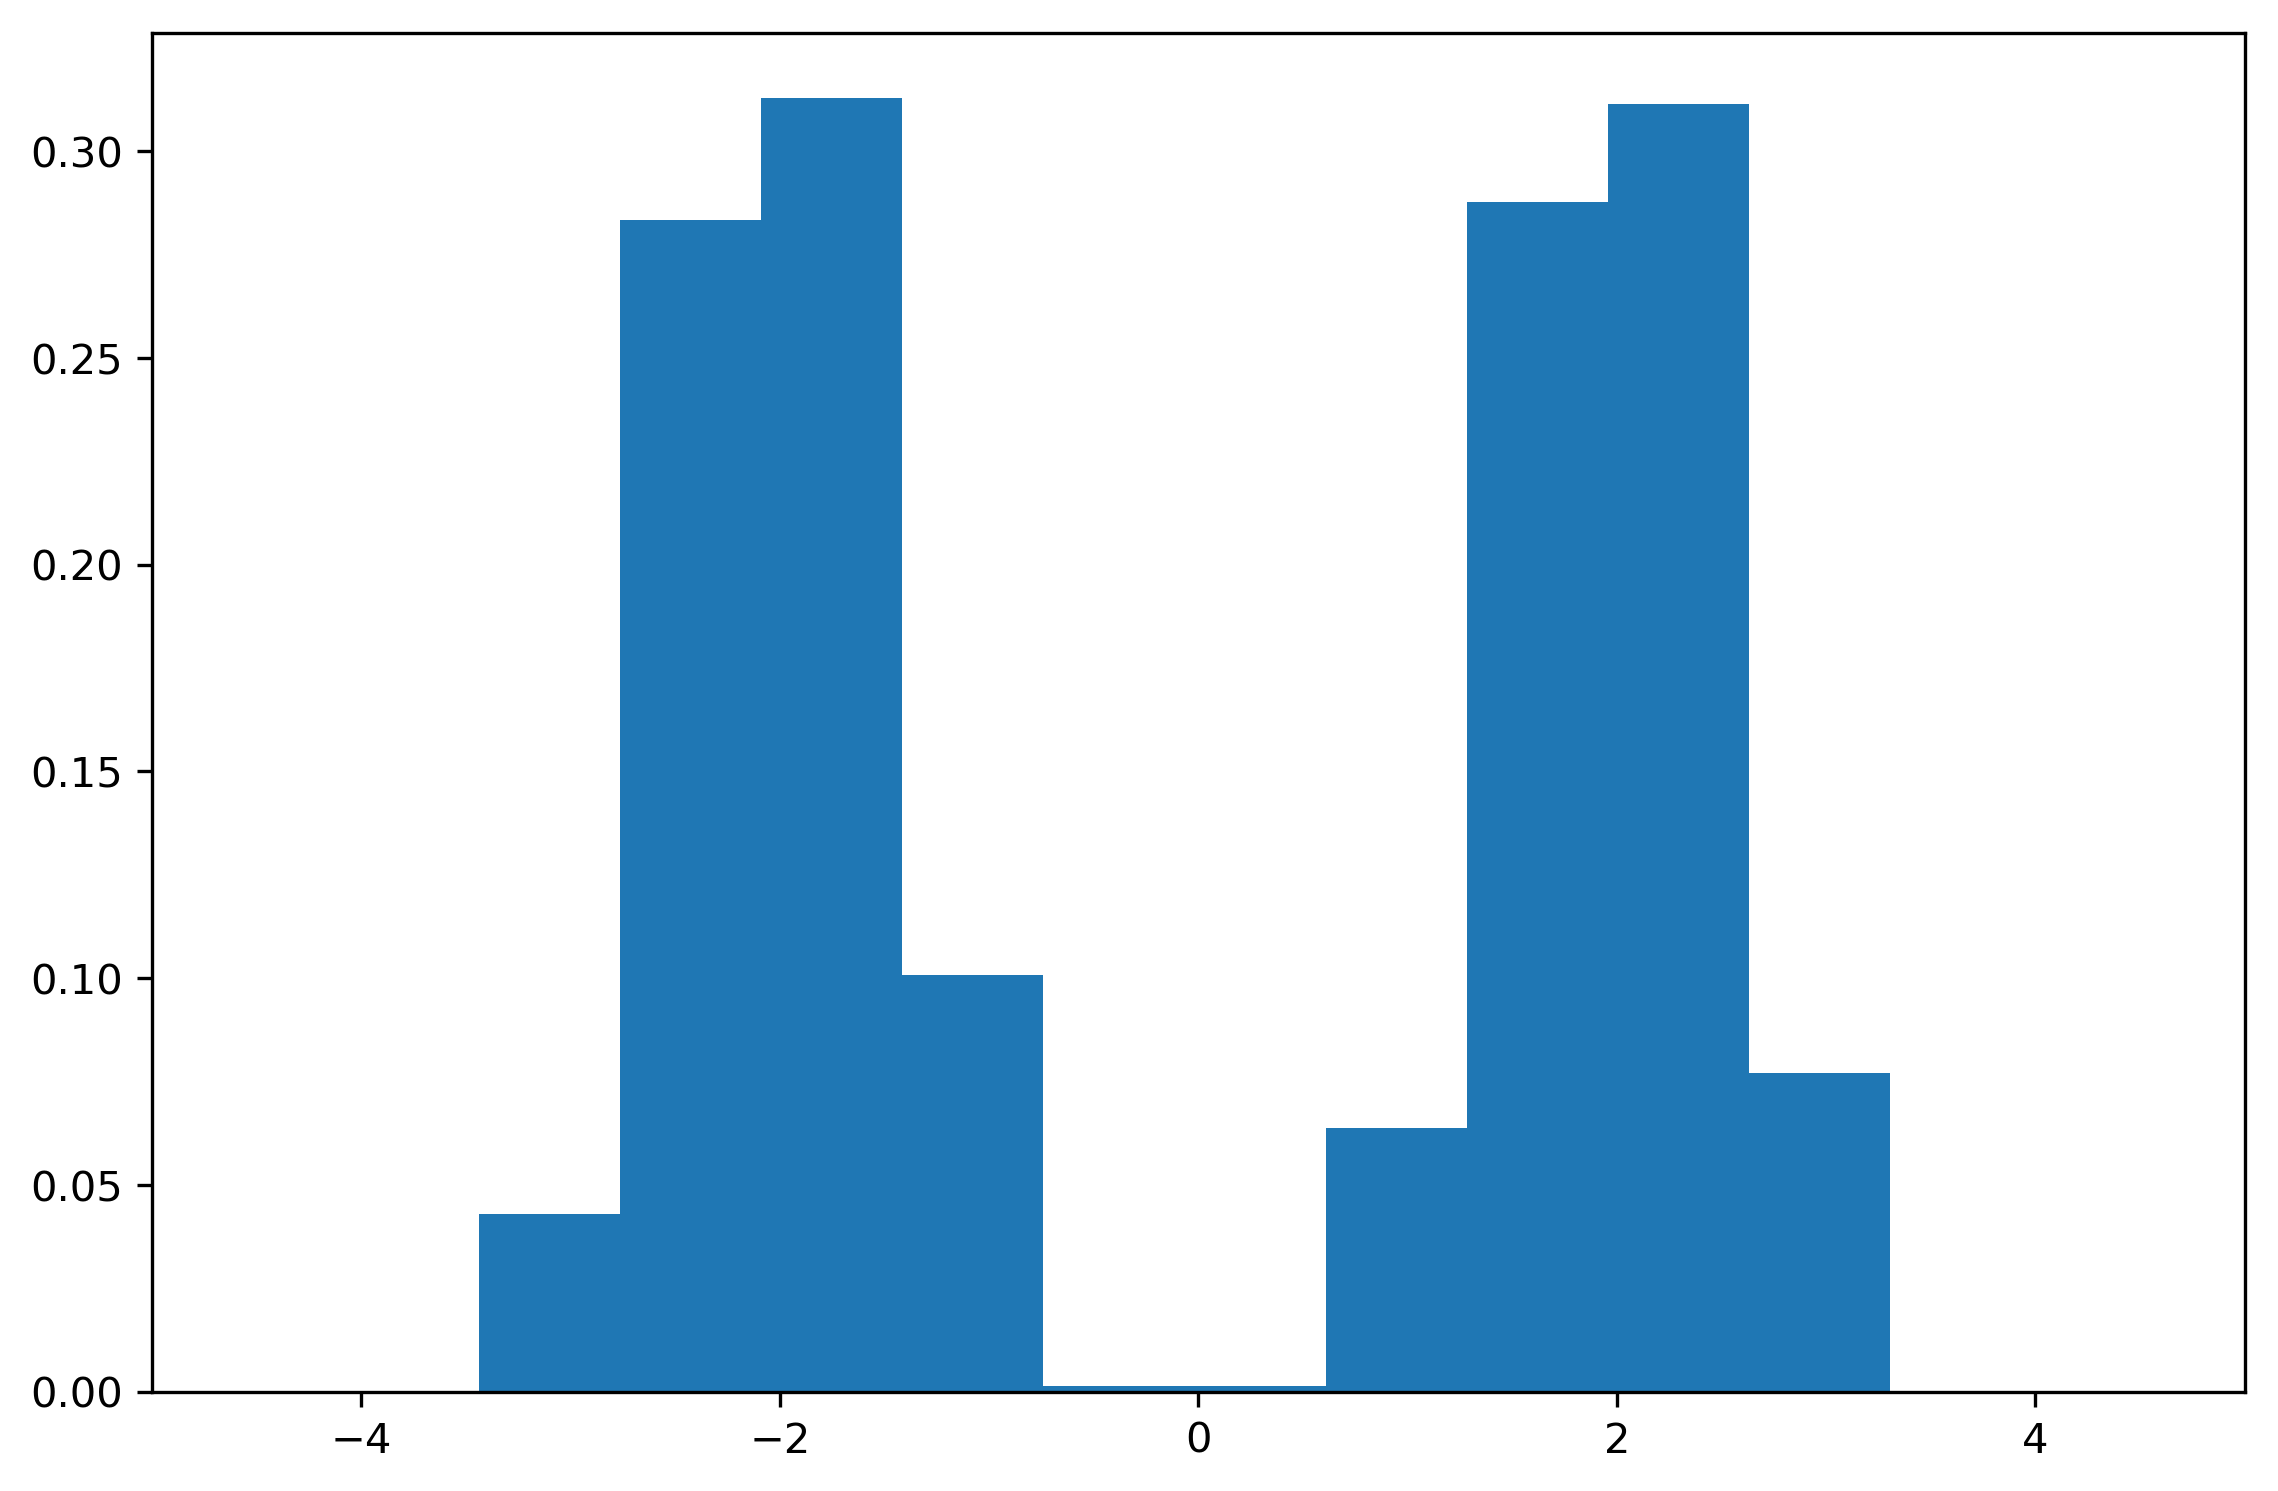

In [27]:
import numpy as np
import matplotlib.pyplot as plt
# default plot settings
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [9, 6]

x = np.concatenate((np.random.normal(loc=-2, scale=.5,size=500), 
                    np.random.normal(loc=2, scale=.5, size=500)))
plt.hist(x, normed=True)
plt.xlim([-5, 5])
plt.show()

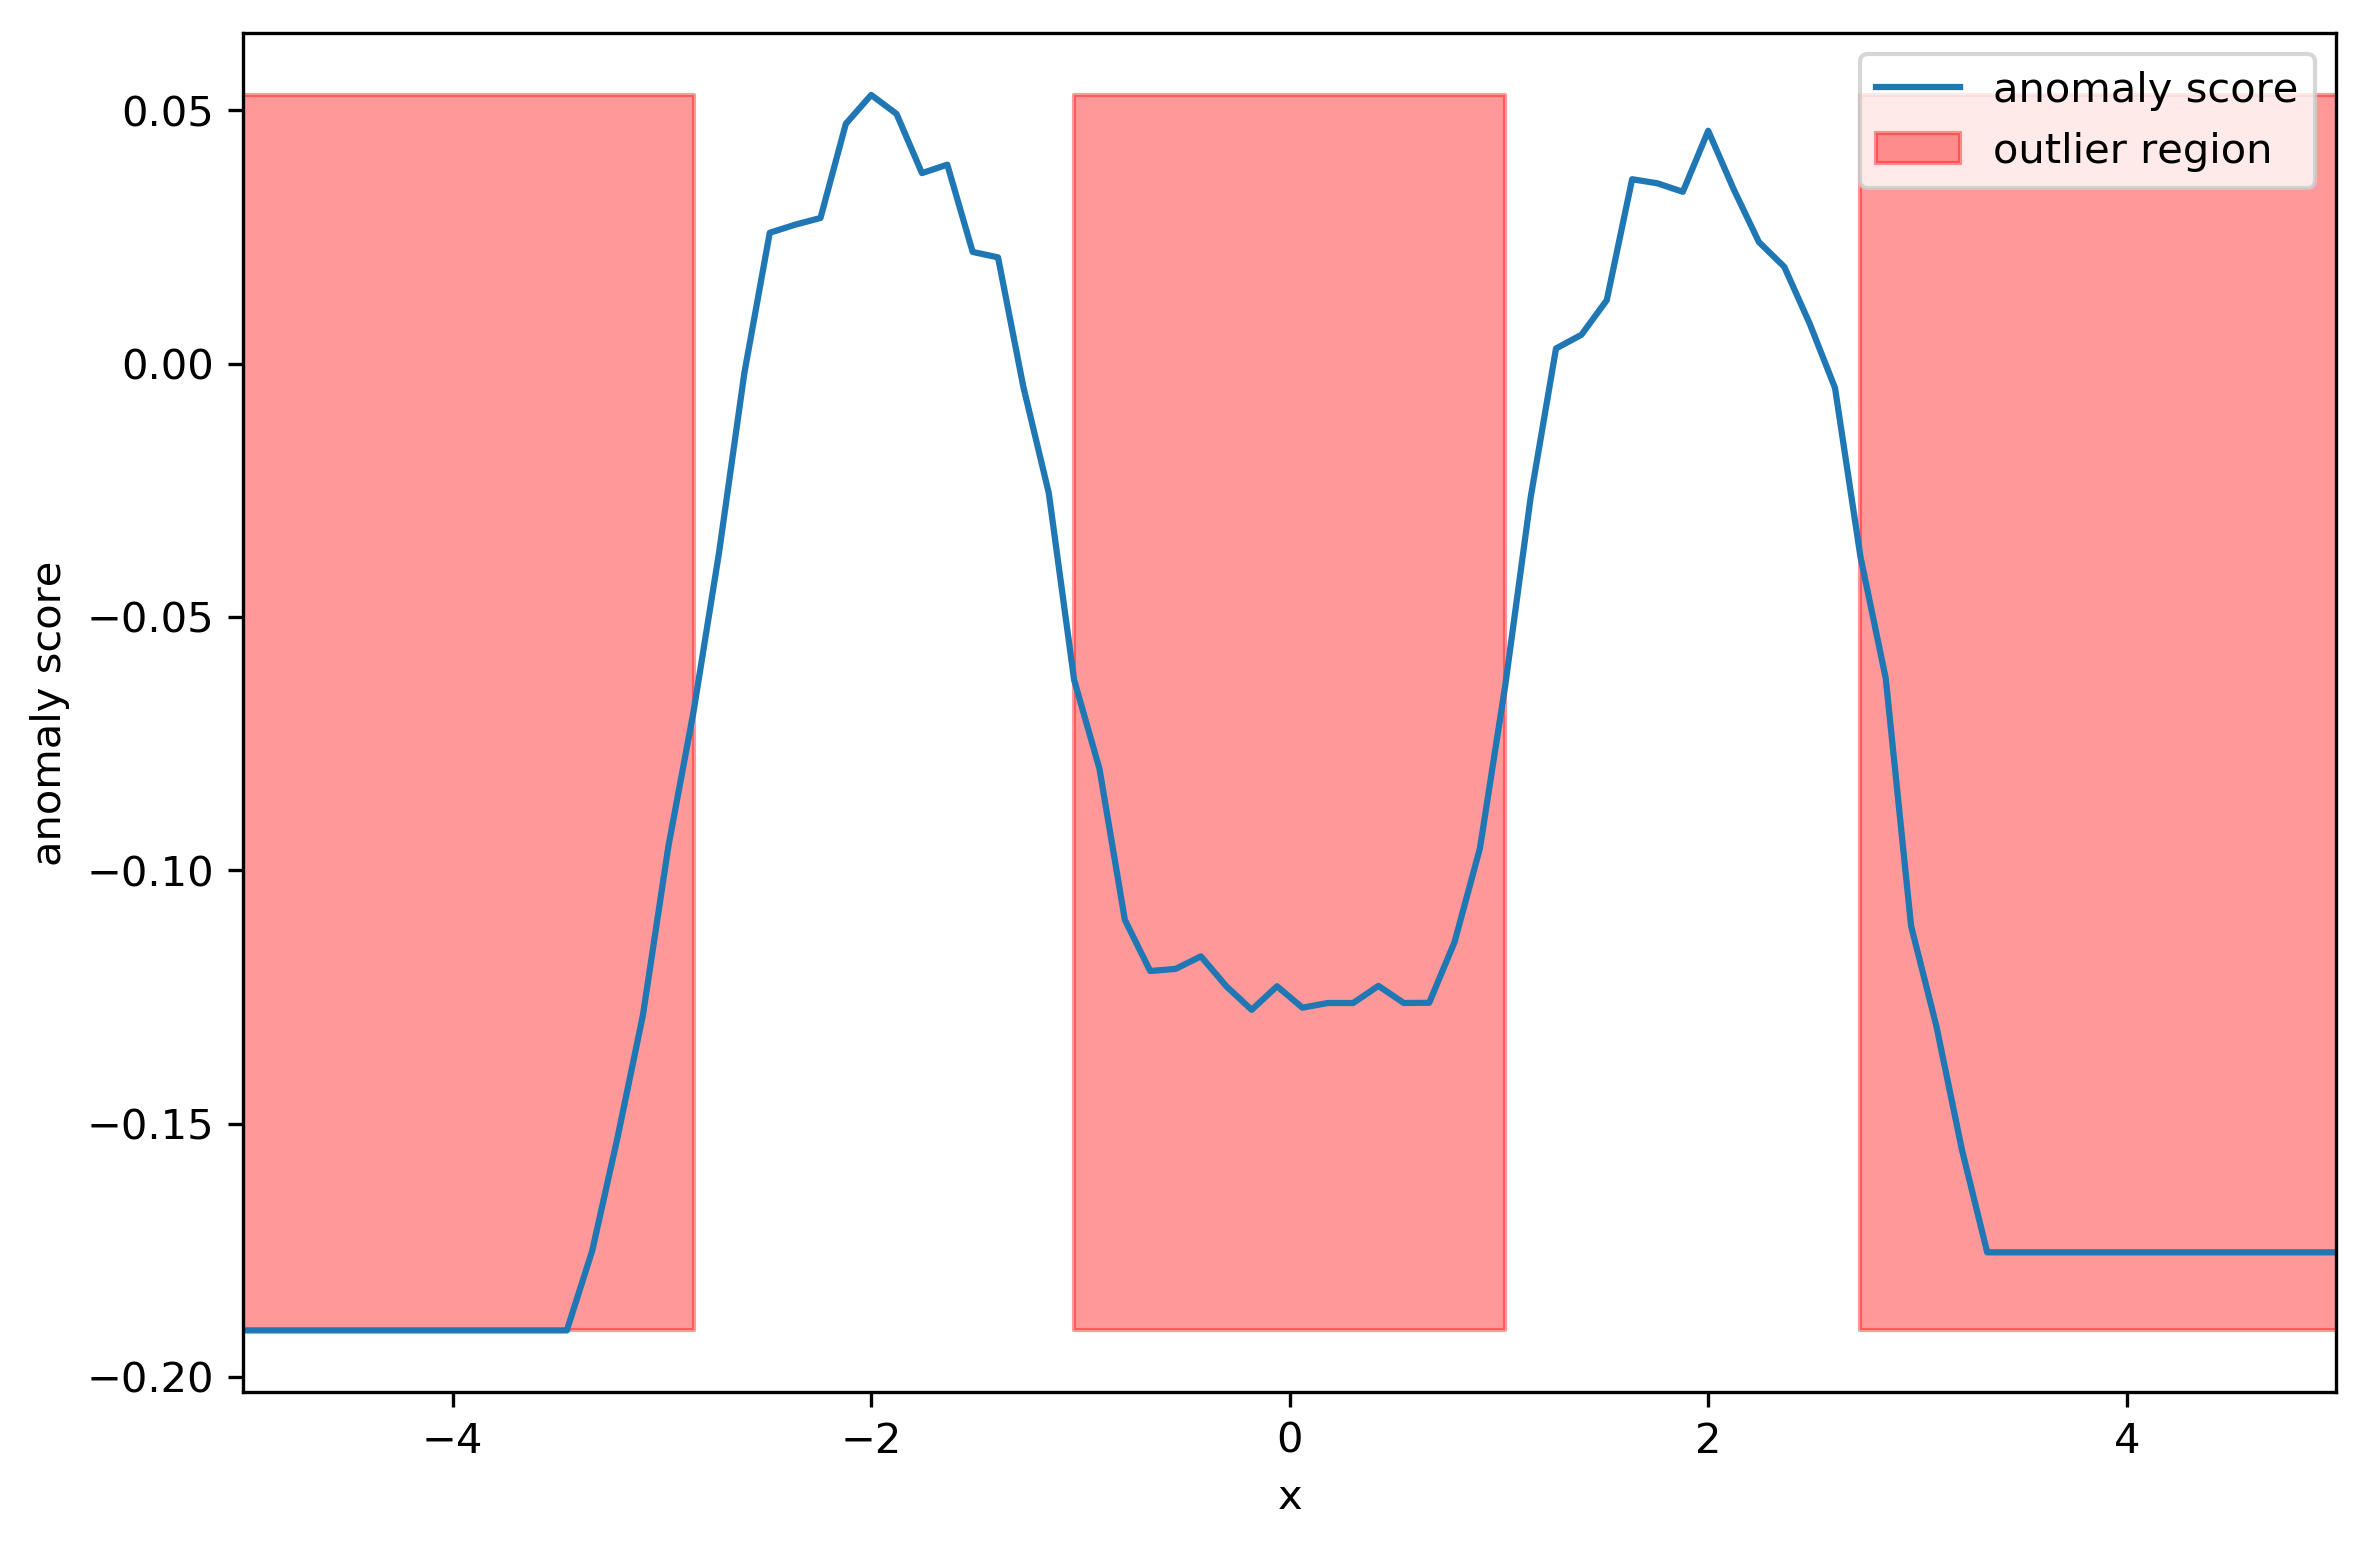

In [28]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(x.reshape(-1, 1))
xx = np.linspace(-6, 6, 100).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.flatten(), np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('x')
plt.xlim([-5, 5])
plt.show()

### decision_function(X)
> The anomaly score of the input samples. The lower, the more abnormal. Negative scores represent outliers, positive scores represent inliers.